# Song Year Prediction on Million Song Dataset using Pyspark

In [1]:
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

### Load file using textFile operation in Spark

In [2]:
songData = sc.textFile('/Users/akshatkumar/YearPredictionMSD.txt')

In [3]:
# The first feature is the decision label Year (target), ranging from 1922 to 2011 and then there are 90 attributes
# TimbreAverage[1-12]
# TimbreCovariance[13-78]

songData.first()

u'2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.57980,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327'

In [4]:
#We will use 'take' method to create and print out a list of the first 2 data points 

totalData = songData.count()
print 'Data Count: {0}'.format(totalData)
print songData.take(1)

Data Count: 515345
[u'2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.57980,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327']


### Extract 12 TimbreAverage features from the total of 90 features

In [5]:
#We first 'split' the data entry on comma, as all the attributes are seperated by that.
#Now will extract first 13 attributes from the songData RDD and display them.
#Index[0] - Label
#Index[1:13] - Timbre Features


songData = songData.map(lambda x: x.split(','))
songData = songData.map(lambda x: x[:13])
songData.take(1)

[[u'2001',
  u'49.94357',
  u'21.47114',
  u'73.07750',
  u'8.74861',
  u'-17.40628',
  u'-13.09905',
  u'-25.01202',
  u'-12.23257',
  u'7.83089',
  u'-2.46783',
  u'3.32136',
  u'-2.31521']]

### Seperating Label which is Year and Features which are Timbre 

In [6]:
#Seperating features and label

songDataFeatures = songData.map(lambda x: x[1:])
songDataLabels = songData.map(lambda x: x[0])

In [7]:
print 'Features = {0}'.format(songDataFeatures.take(1))
#print '\nLabel = {0}'.format(songDataLabels.take(1))

Features = [[u'49.94357', u'21.47114', u'73.07750', u'8.74861', u'-17.40628', u'-13.09905', u'-25.01202', u'-12.23257', u'7.83089', u'-2.46783', u'3.32136', u'-2.31521']]


### Importing Data in Pandas for Timbre Features Analysis and Visualization

In [8]:
timbre_features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't1 9', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36 ', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

In [9]:
data_pd = pd.read_csv("/Users/akshatkumar/YearPredictionMSD.txt", names=timbre_features)

### Variation in values of selected Timbre Features

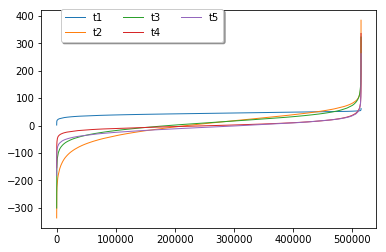

In [10]:
for t in timbre_features[1:6]:
    y = data_pd[t].as_matrix()
    plt.plot(sorted(y), label=t, linewidth=1)

plt.legend(loc='upper center', bbox_to_anchor=(0.3, 1.03), ncol=3, fancybox=True, shadow=True)

In [11]:
X = data_pd.ix[:,1:].as_matrix()  
X = (X - X.min()) / (X.max() - X.min())

### Feature Value Analysis for sample selected song tracks

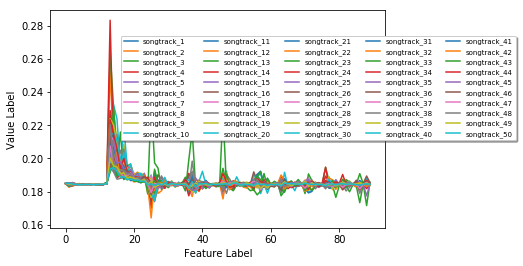

In [12]:
for i in range(1, 51):
    plt.plot(X[i], label='songtrack_' + str(i))
    
plt.xlabel("Feature Label")
plt.ylabel("Value Label")
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.9), ncol=5, fancybox=True, shadow=True, fontsize=7)

### Converting features to LabeledPoint object

In [13]:
#Importing essential libraries and packages

from pyspark.mllib.regression import LabeledPoint
import numpy as np

songData = songData.map(lambda x: LabeledPoint(x[0], np.array(x[1:]))).cache()

In [14]:
#Display labeled data

print songData.take(1)


[LabeledPoint(2001.0, [49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521])]


### Rescaling and normalizing the features
#### Formula used = (feature - min(feature)) / (max(feature) - min(feature))

In [15]:
# Rescaling function the rescales the features corresponding to labels
songFeaturesVertical = [(1.74900,61.97014),(-0.00014,99.98419),(-0.00005,99.99667),
                       (-0.00005,99.97310),(-0.00002,99.95392),(-0.00008,94.18157),
                       (0.00002,99.69957),(-0.00004,9.99954),(-0.00003,93.29561),
                       (-0.00003,9.99995),(-0.00000,9.99999),(-0.00002,9.99992)]

def rescale(x):
    
    dv = []
    for i in range(12):
        val = (x[i] - float(str(songFeaturesVertical[i][0])))/(float(str(songFeaturesVertical[i][1])) - float(str(songFeaturesVertical[i][0])))
        # val = float("{0:.2f}".format(val))
        dv.append(val)
    
    return dv 

songData = songData.map(lambda x: LabeledPoint(x.label,rescale(x.features))).cache()
print songData.take(1)

[LabeledPoint(2001.0, [0.8002932192914316,0.21474645076883545,0.7307994702226234,0.08751009646089974,-0.17414281017836813,-0.13908197615989953,-0.2508741513878448,-1.223304378783909,0.08393661268629489,-0.2467804935609871,0.3321363321363321,-0.23152038912233475])]


### Adding relevant features using the concept of 2-way interaction

In [16]:
# Till now, we have been using 12 timbre features, however accuracy of the system enhances rapidly, 
# if more number of relevant features are added. 
# For that, we used the concept of 2-way interaction among the features. 
# Suppose there are 3 features a,b and c. Then apart from these three features, 
# we can add some more features like a*a, a*b, a*c, b*b, b*c etc.

import math
def twoWayInteractions(lp):
    return LabeledPoint(lp.label,np.hstack([lp.features,
                                            lp.features[0]*lp.features[0],
                                            lp.features[0]*lp.features[1],
                                            lp.features[0]*lp.features[2],
                                            lp.features[0]*lp.features[3],
                                            lp.features[0]*lp.features[4],
                                            
                                            lp.features[1]*lp.features[1],
                                            lp.features[1]*lp.features[2],
                                            lp.features[1]*lp.features[3],
                                            lp.features[1]*lp.features[4],
                                                                                    
                                            lp.features[2]*lp.features[2],
                                            lp.features[2]*lp.features[3],
                                            lp.features[2]*lp.features[4],
                                            
                                            lp.features[3]*lp.features[3],
                                            lp.features[3]*lp.features[4],
                                            
                                            lp.features[4]*lp.features[4],
                                            
                                            math.pow(lp.features[0],3),
                                            math.pow(lp.features[1],3),
                                            math.pow(lp.features[2],3),
                                            math.pow(lp.features[3],3),
                                            math.pow(lp.features[4],3),
                                            
                                            lp.features[0]*lp.features[0]*lp.features[1],
                                            lp.features[1]*lp.features[1]*lp.features[2],
                                            lp.features[2]*lp.features[2]*lp.features[3],
                                            lp.features[3]*lp.features[3]*lp.features[4],
                                            lp.features[4]*lp.features[4]*lp.features[0],
                                            
                                           ]))

songData = songData.map(lambda x: twoWayInteractions(x))
songData.take(1)

[LabeledPoint(2001.0, [0.8002932192914316,0.21474645076883545,0.7307994702226234,0.08751009646089974,-0.17414281017836813,-0.13908197615989953,-0.2508741513878448,-1.223304378783909,0.08393661268629489,-0.2467804935609871,0.3321363321363321,-0.23152038912233475,0.6404692368438434,0.17186012841720025,0.5848538606809359,0.07003373681719717,-0.13936531017410292,0.04611603811781186,0.15693659245405361,0.018792482621416647,-0.03739655041271559,0.534067865677667,0.0639523321327562,-0.1272634734214303,0.007658016982595978,-0.01523925411668115,0.030325718336819157,0.5125631874108858,0.009903255509320424,0.39029651330016624,0.0006701538048461825,-0.005281005811851356,0.13753849543884003,0.033701576225263215,0.046736330442119486,-0.0013335885977429308,0.024269466755098203])]

### Analysing Label of the dataset

In [17]:
#Extracting labels from the records

t0 = time()

label_analysis = songData.map(lambda x: x.label)

#Maximum and min labels
min_label = label_analysis.min()
max_label = label_analysis.max()

#Label Count
#Output - (label,count)
label_analysis = label_analysis.map(lambda x: (x,1)).reduceByKey(lambda x,y: x+y).sortByKey()
#print label_analysis.take(10)


print 'Minimum year data: {0}'.format(min_label)
print 'Maximum year data: {0}'.format(max_label)

t1 = time() - t0
print t1

Minimum year data: 1922.0
Maximum year data: 2011.0
175.651139975


###  Matplotlib for visualization

In [18]:
label_analysis_year = label_analysis.map(lambda (x,y): x).collect()
label_analysis_count = label_analysis.map(lambda (x,y): y).collect()

print 'Year: {0}'.format(label_analysis_year[:10])
print 'Count: {0}'.format(label_analysis_count[:10])
print 'Length of Year vector: {0}'.format(len(label_analysis_year))
print 'Maximum count: {0}'.format(max(label_analysis_count))

Year: [1922.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0]
Count: [6, 5, 7, 19, 42, 52, 93, 40, 35, 11]
Length of Year vector: 89
Maximum count: 39404


### Track Count vs Year Visualization
##### We have taken the songs starting from 1922.
##### So this graph shows us the number of tracks that were released in each year.
##### We have shifted the lables so that it would be easier for us during further processing.

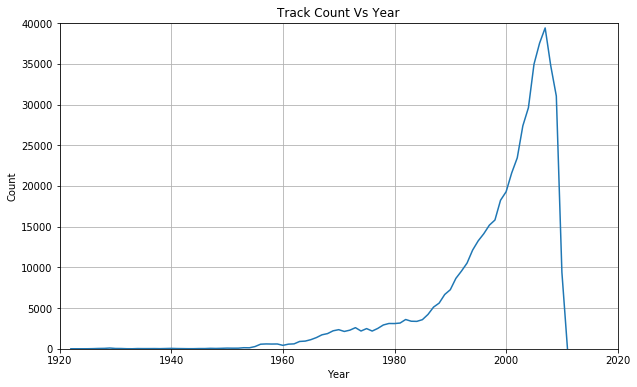

In [19]:
fig = plt.figure(figsize=(10,6), facecolor='white')
plt.axis([1920, max(label_analysis_year) + 9, 0, max(label_analysis_count) + 650])
plt.grid(b=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Track Count Vs Year')
plt.plot(label_analysis_year,label_analysis_count)

### Shifting Labels

In [20]:
# In order to simplify the complexity and enhance the efficiency of the predictive model, all
# the values of the labels will be shifted, in order to start from 0.
# This means that the Value of the first label, ie 1922 will be shifted to the value 0 1923 :1 , 1924: 2 so on.


songData = songData.map(lambda x: LabeledPoint((x.label-min_label), x.features))
print songData.take(1)

label_analysis = songData.map(lambda x: x.label)
label_analysis = label_analysis.map(lambda x: (x,1)).reduceByKey(lambda x,y: x+y).sortByKey()

label_analysis_shifted_year = label_analysis.map(lambda (x,y): x).collect()
label_analysis_shifted_count = label_analysis.map(lambda (x,y): y).collect()

print 'Shifted Year: {0}'.format(label_analysis_shifted_year[:5])
print 'Count per shifted year: {0}'.format(label_analysis_shifted_count[:5])

[LabeledPoint(79.0, [0.8002932192914316,0.21474645076883545,0.7307994702226234,0.08751009646089974,-0.17414281017836813,-0.13908197615989953,-0.2508741513878448,-1.223304378783909,0.08393661268629489,-0.2467804935609871,0.3321363321363321,-0.23152038912233475,0.6404692368438434,0.17186012841720025,0.5848538606809359,0.07003373681719717,-0.13936531017410292,0.04611603811781186,0.15693659245405361,0.018792482621416647,-0.03739655041271559,0.534067865677667,0.0639523321327562,-0.1272634734214303,0.007658016982595978,-0.01523925411668115,0.030325718336819157,0.5125631874108858,0.009903255509320424,0.39029651330016624,0.0006701538048461825,-0.005281005811851356,0.13753849543884003,0.033701576225263215,0.046736330442119486,-0.0013335885977429308,0.024269466755098203])]
Shifted Year: [0.0, 2.0, 3.0, 4.0, 5.0]
Count per shifted year: [6, 5, 7, 19, 42]


### Track Count vs Year Visualization after Label Shifting

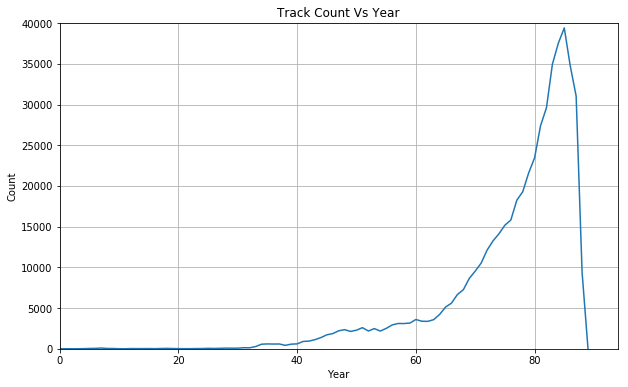

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6), facecolor='white')
plt.axis([0, max(label_analysis_shifted_year)+5, 0, max(label_analysis_shifted_count)+650])
plt.grid(b=True)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Track Count Vs Year')
plt.plot(label_analysis_shifted_year,label_analysis_shifted_count)
#plot_url = py.plot_mpl(fig)

### Feature Analysis using Heat Map
#### Darker the shade means that the value of the feature is approaching 1
#### Lighter the shade - Value of the feature approaching 0

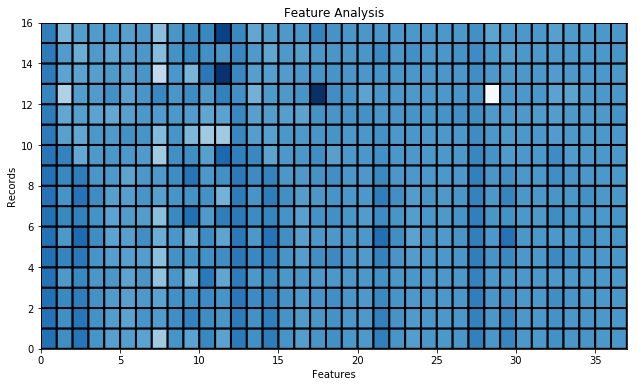

In [22]:
#Heat Map Generation

import matplotlib.pyplot as plt
import numpy as np

#Taking 15 Features 
songDataFeatures = songData.map(lambda x: x.features).take(16)

he = []
i = 0
while i < 16:
    he.append(songDataFeatures[:16][i])
    i += 1

data=np.array([he[0],he[1],he[2],he[3],he[4],
               he[5],he[6],he[7],he[8],he[9],
               he[10],he[11],he[12],he[13],
               he[14],he[15]])

# print he[0]
# print he[1]
# print he[2]

fig = plt.subplots(figsize=(10.5, 6), facecolor='white', edgecolor='white')
plt.title('Feature Analysis')
plt.xlabel('Features')
plt.ylabel('Records')
c = plt.pcolor(data,cmap=plt.cm.Blues,edgecolors='k', linewidths=2)

plt.show()

### Split data into train, validation and test set

In [23]:
# 80% of the whole songdata is training data
# 10% of the whole songdata is testing data
# 10% of the whole songdata is validation data

weights = [0.8, 0.1, 0.1]
seed = 12

#randomSplit is the method that we would use to split our data in training, testing and validation set
songtrainData, songvalidationData, songtestData = songData.randomSplit(weights,seed)

#We would cache each of the datasets for future use

songtestData.cache()
songtrainData.cache()
songvalidationData.cache()

#Data count in each sets

print 'Test dataset: {0}'.format(songtestData.count())
print 'Train dataset: {0}'.format(songtrainData.count())
print 'Validation dataset: {0}'.format(songvalidationData.count())

Test dataset: 51511
Train dataset: 412113
Validation dataset: 51721


### Analysing The Dataset Division using Pie Chart

([<matplotlib.patches.Wedge at 0x125b1de90>,
 [Text(-0.929697,0.676877,u'Training Data'),
  Text(0.698645,-0.963325,u'Validation Data'),
  Text(1.13181,-0.367568,u'Testing Data')])

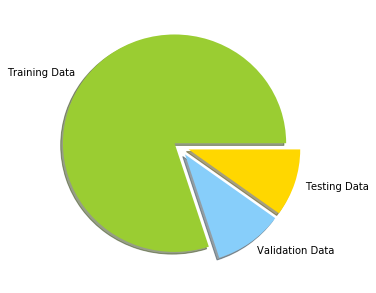

In [24]:
#Defining and declaring all the attributes of .pie method of plt

fig = plt.figure(figsize=(5, 5), facecolor='white', edgecolor='white')
colors = ['yellowgreen', 'lightskyblue', 'gold']
labels = ['Training Data', 'Validation Data', 'Testing Data']
fractions = [songtrainData.count(), songvalidationData.count(), songtestData.count()]
explode = (0.05, 0.09, 0.09)

#Plot the pie chart
plt.pie(fractions, labels=labels, shadow=True, colors=colors, explode=explode)

# STAGE 2 - Model Framework Implementation

## Four machine learning models built for Song Year Prediction
#### 1. Baseline Model
#### 2. Linear Regression Model
#### 3. Random Forests Model
#### 4. Gradient Boosted Trees Model

### Baseline Model
##### Created a baseline model for us so that the results of the predictions of other machine learning algorithms could be compared against this baseline model

In [26]:
songtrainData_baseline = songtrainData.map(lambda x: x.label)
songtrainData_baseline_prediction = songtrainData_baseline.mean()

songtrainData_baseline_prediction = float("{0:0.1f}".format(songtrainData_baseline_prediction))

print 'Baseline Model Prediction is : {0}'.format(songtrainData_baseline_prediction)

Baseline Model Prediction is : 76.4


#### A baseline model has been developed that predicts the average of all the years in our dataset. In our case, the average comes out to be 76.4 (after shifting the year label)

In [27]:
songvalidationData_baseline = songvalidationData.map(lambda x: x.label)
songtestData_baseline = songtestData.map(lambda x: x.label)

### RMSE for Training, Validation and Test Dataset - Baseline Model

In [28]:
import math

data = []

def RMSE(data):
    
    err = data.map(lambda (x,y): math.pow((x-y),2)).mean()
    err = math.sqrt(err)  
    
    return err



generateData = songtrainData_baseline.map(lambda x: (x,songtrainData_baseline_prediction))
songtrainData_baseline_prediction_error = RMSE(generateData)

generateData = songvalidationData_baseline.map(lambda x: (x,songtrainData_baseline_prediction))
songvalidationData_baseline_prediction_error = RMSE(generateData)

generateData = songtestData_baseline.map(lambda x: (x,songtrainData_baseline_prediction))
songtestData_baseline_prediction_error = RMSE(generateData)

print '\nRMSE for training data: {0}'.format(songtrainData_baseline_prediction_error)
print '\nRMSE for validation data: {0}'.format(songvalidationData_baseline_prediction_error)
print '\nRMSE for test data: {0}'.format(songtestData_baseline_prediction_error)


RMSE for training data: 10.9315769178

RMSE for validation data: 10.8973220636

RMSE for test data: 10.9604692243


In [ ]:
baseline_training_error = songtrainData_baseline_prediction_error
baseline_validation_error = songvalidationData_baseline_prediction_error
baseline_testing_error = songtestData_baseline_prediction_error = RMSE(generateData)

### Linear regression Model 
#### Applied on Training Data

In [31]:
from pyspark.mllib.regression import LinearRegressionWithSGD, LinearRegressionModel

# Build the model

t0_regression = time()

firstModel = LinearRegressionWithSGD.train(songtrainData,iterations=200, step=3.5,
                                          miniBatchFraction=1.0, initialWeights=None, 
                                           regParam=1, regType=None, intercept=True)

t1_regression = time() - t0_regression

print 'Model has been trained\n'
print 'Time taken to train the linear regression model is {0:.2f}'.format(t1_regression)
# Evaluate the model on training data
valuesAndPreds = songtrainData.map(lambda x: (x.label, float(firstModel.predict(x.features))))
valuesAndPreds_test_regression = songtestData.map(lambda x: (x.label, float(firstModel.predict(x.features))))

/Users/akshatkumar/home/prakhar/akshat/spark-2.0.1-bin-hadoop2.4/python/pyspark/mllib/regression.py:281: UserWarning:

Deprecated in 2.0.0. Use ml.regression.LinearRegression.



Model has been trained

Time taken to train the linear regression model is 14.57


### Linear Regression RMSE
#### Applied on Test and Validation dataset and sample output check

In [32]:
from pyspark.mllib.evaluation import RegressionMetrics

metrics = RegressionMetrics(valuesAndPreds)
metricstest = RegressionMetrics(valuesAndPreds_test_regression)

linearRegression_trining_error = metrics.rootMeanSquaredError
linearRegression_testing_error = metricstest.rootMeanSquaredError
# Error
print("RMSE training = %s" % linearRegression_trining_error)
print("RMSE testing = %s" % linearRegression_testing_error)

#SAVE MODEL 1
firstModel.save(sc, 'regression_model_200_3.5')


# In[24]:

#Checking the output
print valuesAndPreds.take(3)

RMSE training = 10.0068014157
RMSE testing = 10.0192673543
[(79.0, 75.79272266789087), (79.0, 76.49427000290123), (79.0, 78.1691602885039)]


#### A linear regression based model has been implemented to predict the year of a particular song. The model so developed has outperformed the accuracy obtained from baseline model on the validation and testing set at the first decimal place itself.

### Actual vs Predicted Values Plot for Linear Regression Model

Actual :[79.0, 81.0, 75.0, 65.0, 78.0, 79.0, 87.0, 87.0, 87.0, 87.0]
Predicted :[80.27208775729586, 75.72323071443373, 65.45801097542437, 71.33502325278737, 80.33010689214265, 78.76427995288515, 82.22186331409571, 81.9408409776206, 83.3448094865397, 80.08897431009386]


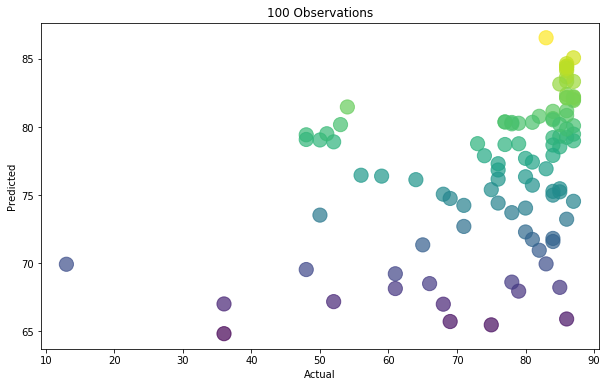

In [53]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
X = valuesAndPreds.map(lambda (x,y):x).take(100)
Y = valuesAndPreds.map(lambda (x,y):y).take(100)

print 'Actual :' + str(X[:10])
print 'Predicted :' + str(Y[:10])

fig = plt.subplots(figsize=(10, 6), facecolor='white', edgecolor='white')
plt.title('100 Observations')
plt.xlabel('Actual')
plt.ylabel('Predicted')
area = np.pi * (8)**2
plt.scatter(X, Y, s = area, c = Y , alpha=0.7)
plt.show()

### Grid Search - Hypertune the parameters
#### In order to obtain the best results, we automated the tuning of the parameters of the model. Some of the very important parameters like iterations and step-size were given various values, and the best combination of the two was selected - using Grid search technique.

In [43]:
for itr in iterations[:]:
    for stp in stepSize[:]:        
        sampleModel = LinearRegressionWithSGD.train(songtrainData,iterations=itr, 
                                                            step=stp,miniBatchFraction=1.0,initialWeights=None,
                                                            regParam=1, regType=None, intercept=True)
        labelsAndPreds = songtrainData.map(lambda lp: (lp.label, sampleModel.predict(lp.features)))
        sampleRMSE = RMSE(labelsAndPreds)
        
        resultRMSE.append(sampleRMSE)
        resultStepSize.append(stp)
        resultIter.append(itr)
        count += 1
        
        if count%10 == 0:
            print sampleRMSE 

        if sampleRMSE < bestRMSE:
            bestRMSE = sampleRMSE
            secondModel = sampleModel
            bestStepSize = stp
            bestIterationNo = itr

print 'Best Stepsize is {0}'.format(bestStepSize)
print 'Best Iteration number is {0}'.format(bestIterationNo)
print 'Best RMSE is {0}'.format(bestRMSE)


70.377564853
26.6005860604
10.885765929
10.1622096194
10.095557766
10.0625388501
10.0068014157
9.98422170951
9.97135019146
Best Stepsize is 5
Best Iteration number is 500
Best RMSE is 9.97135019146


### Random Forests Model
#### Random forests train a set of decision trees separately, so the training can be done in parallel. The algorithm injects randomness into the training process so that each decision tree is a bit different. Combining the predictions from each tree reduces the variance of the predictions, improving the performance on test data.

In [47]:
from pyspark.mllib.tree import RandomForest

# Train a RandomForest model.
t0_rf = time()

secondModel = RandomForest.trainRegressor(songtrainData, categoricalFeaturesInfo={},
                                    numTrees=20, featureSubsetStrategy="auto",
                                    impurity='variance', maxDepth=15, maxBins=32)

t1_rf = time() - t0_rf

print 'Model trained\n'
print 'Time taken to complete is {0:.2f}'.format(t1_rf)

Model trained

Time taken to complete is 534.91


### Random Forests on Training Data

In [48]:
from pyspark.mllib.evaluation import RegressionMetrics


#valuesAndPreds = songtrainData.map(lambda x: (x.label, secondModel.predict(x.features)))

predictions = secondModel.predict(songtrainData.map(lambda x: x.features))
valuesAndPreds = songtrainData.map(lambda x: x.label).zip(predictions)

#valuesAndPreds.take(10)

#valuesAndPreds.take(3)
randomForest_training = RegressionMetrics(valuesAndPreds)
randomForest_training_error = randomForest_training.rootMeanSquaredError
# Error
print("RMSE Training = %s" % randomForest_training_error)

RMSE Training = 8.19813471494


### Random Forests on Validation and Test Data

In [49]:
from pyspark.mllib.tree import RandomForestModel
secondModel.save(sc, 'forest_model_20')

predictions = secondModel.predict(songvalidationData.map(lambda x: x.features))
valuesAndPreds = songvalidationData.map(lambda x: x.label).zip(predictions)

randomForest_validation = RegressionMetrics(valuesAndPreds)
randomForest_validation_error = randomForest_validation.rootMeanSquaredError

predictions = secondModel.predict(songtestData.map(lambda x: x.features))
valuesAndPreds = songtestData.map(lambda x: x.label).zip(predictions)

randomForest_testing = RegressionMetrics(valuesAndPreds)
randomForest_testing_error = randomForest_testing.rootMeanSquaredError

# Error
print("RMSE Validation = %s" % randomForest_validation.rootMeanSquaredError)
print("RMSE Testing = %s" % randomForest_testing.rootMeanSquaredError)

RMSE Validation = 9.63394514379
RMSE Testing = 9.67469422731


### Gradient Boosted Trees
#### Gradient boosting iteratively trains a sequence of decision trees. On each iteration, the algorithm uses the current ensemble to predict the label of each training instance and then compares the prediction with the true label. The dataset is re-labeled to put more emphasis on training instances with poor predictions. Thus, in the next iteration, the decision tree will help correct for previous mistakes.

In [59]:
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel

t0 = time()

thirdModel = GradientBoostedTrees.trainRegressor(songtrainData,
    categoricalFeaturesInfo={}, numIterations=60)

t1 = time() - t0

print 'Model Trained'
print 'Time :{0:.2f}'.format(t1)
print '\n'

predictions = thirdModel.predict(songtrainData.map(lambda x: x.features))
labelsAndPredictions = songtrainData.map(lambda lp: lp.label).zip(predictions)
metrics = RegressionMetrics(labelsAndPredictions)
gb_training_error = metrics.rootMeanSquaredError
print("RMSE training= %s" % metrics.rootMeanSquaredError)

predictions = thirdModel.predict(songtestData.map(lambda x: x.features))
valuesAndPreds = songtestData.map(lambda x: x.label).zip(predictions)

gb_testing = RegressionMetrics(valuesAndPreds)

gb_testing_error = gb_testing.rootMeanSquaredError

print gb_testing_error

Model Trained
Time :124.96


RMSE training= 9.75728837538
9.77979159606


In [71]:
#Save Model
thirdModel.save(sc, 'boosted_model_60')

### Machine Learning Models Performance Benchmarking 
#### 1. Baseline Model
#### 2. Linear Regression - SGD
#### 3. Random Forest - RF
#### 4. Gradient Boosted Trees - GBT

[10.93157691779109, 10.006801415674499, 8.19813471493724, 9.757288375375461]
[10.960469224292563, 10.01926735430041, 9.674694227312171, 9.779791596056794]


([<matplotlib.axis.XTick at 0x127b01cd0>,
 <a list of 4 Text xticklabel objects>)

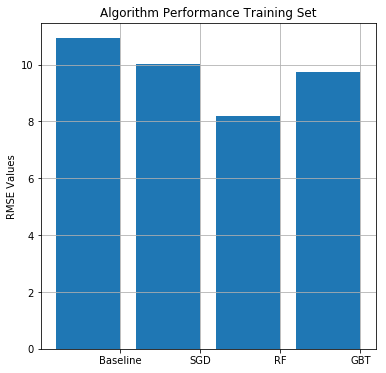

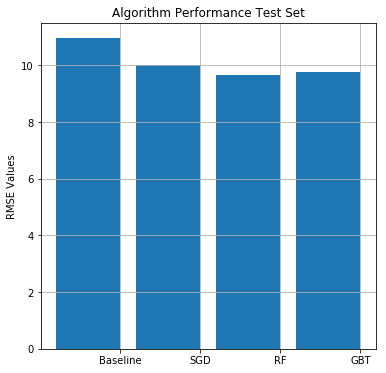

In [67]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import plotly.plotly as py
%matplotlib inline

x_axis = ['Baseline','SGD','RF', 'GBT']
y_axis = [baseline_training_error,linearRegression_trining_error,randomForest_training_error,gb_training_error]
print y_axis
ind = np.arange(len(x_axis))

fig = plt.figure(figsize=(6,6), facecolor='white')

plt.bar(ind, y_axis)
plt.grid(b=True)
plt.ylabel('RMSE Values')
plt.title('Algorithm Performance Training Set')
plt.xticks(ind+0.4, x_axis)

# Testing Set
x_axis = ['Baseline','SGD','RF', 'GBT']
y_axis = [baseline_testing_error,linearRegression_testing_error,randomForest_testing_error,gb_testing_error]
print y_axis
ind = np.arange(len(x_axis))

fig = plt.figure(figsize=(6,6), facecolor='white')

plt.bar(ind, y_axis)
plt.grid(b=True)
plt.ylabel('RMSE Values')
plt.title('Algorithm Performance Test Set')
plt.xticks(ind+0.4, x_axis)

### Prediction for User Song
#### Loading audio features through Echo Nest API and processing it to feed to already developed machine learning models  
####  Echo Nest API allows developers to analyze tracks and to add rich artist and song metadata to their applications

In [6]:
from pyechonest import track, artist
from pyechonest import config
import sys
import re
#Authenticate with API Key
API_KEY = "XOHPGDVM8JJOSGFQK"
config.ECHO_NEST_API_KEY=API_KEY


def evaluate(path):
    user_input_file = str(path)
    

    t = track.track_from_filename(user_input_file)
    t.get_analysis()
    
    #print t.meta['artist']

    # Open file to save timbre feature into file
    f = open("/Users/akshatkumar/Downloads/resul.txt","w")
    f.write(str(t.segments))
    f.close()

    f = open("/Users/akshatkumar/Downloads/resul.txt","r")
    filetext = f.read()
    f.close()

    # Used to get timbre features out
    regex = "timbre.+?\[(.+?)\]"

    matches = re.findall(regex, filetext)

    #Count for number of feature sets
    count = 0
    for match in matches:
        count += 1
    print str(count) + ' lists of features'
    
    feature_set = []
    for i in range(count):
        matches[i] = matches[i].split(',') 
        
    for i in range(len(matches)):
        for j in range(12):
            matches[i][j] = float(matches[i][j])
            
    timbre_1 = 0; timbre_2 = 0 ; timbre_3 = 0; timbre_4 = 0 ; timbre_5 = 0; timbre_6 = 0 ; 
    timbre_7 = 0; timbre_8 = 0 ; timbre_9 = 0; timbre_10 = 0 ; timbre_11 = 0; timbre_12 = 0

    for j in range(len(matches)):
        timbre_1 += matches[j][0]
        timbre_2 += matches[j][1]
        timbre_3 += matches[j][2]
        timbre_4 += matches[j][3]
        timbre_5 += matches[j][4]
        timbre_6 += matches[j][5]
        timbre_7 += matches[j][6]
        timbre_8 += matches[j][7]
        timbre_9 += matches[j][8]
        timbre_10 += matches[j][9]
        timbre_11 += matches[j][10]
        timbre_12 += matches[j][11]
    timbre = [timbre_1,timbre_2,timbre_3,timbre_4,timbre_5,timbre_6,timbre_7,timbre_8,timbre_9,timbre_10,
              timbre_11,timbre_12]
    
    for i in range(12):
        timbre[i] = timbre[i] / float(count)
    Timbre = timbre
    
    Timbre = rescale(Timbre)
    return Timbre

### Prediction for User Song
#### Predicting year of the input file of  audio features provided by the user by loading the already existing Linear Regression, Random Forest and Gradient Boosted Trees Model

In [7]:
from pyspark.mllib.tree import GradientBoostedTreesModel,RandomForestModel
from pyspark.mllib.regression import  LinearRegressionModel

thirdModel = GradientBoostedTreesModel.load(sc,'boosted_model_60')
firstModel = LinearRegressionModel.load(sc, "regression_model_200_3.5")
secondModel = RandomForestModel.load(sc, "forest_model_20")

global thirdModel
global firstModel
global secondModel

def predict_year(thirdModel,secondModel,firstModel,Timbre):
    
    
    predictions_gb = thirdModel.predict(Timbre)
    predictions_gb = predictions_gb + 1922
    
    predictions_regression = firstModel.predict(Timbre)
    predictions_regression = 1922+predictions_regression
    
    
    predictions_randomForest = secondModel.predict(Timbre)
    predictions_randomForest = 1922+predictions_randomForest
    
    return [predictions_gb,predictions_randomForest,predictions_regression]

### Results, Conclusions and Future Scope in the Summary Report